In [87]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta,time
import os

In [88]:
print(os.getcwd())
print(os.path.exists('./imbalance/GOOGL_1s_3_50PM_to_4_00PM.csv'))

C:\Users\PC\PycharmProjects\Navis_Starter_Project
True


Getting 1sec data for all the symbols

In [89]:
symbols = ['AAPL','GOOGL','META','MSFT', 'TSLA','AMZN','NVDA'];

In [107]:
for symbol in symbols:
    # Construct the file name
    file_name = f"./imbalance/{symbol}_1s_3_50PM_to_4_00PM.csv"

    # Read the CSV file into a DataFrame
    df_name = f"df_1sec_{symbol}"
    locals()[df_name] = pd.read_csv(file_name);

    # Print a preview of the DataFrame (optional)
    print(f"Preview of DataFrame for {symbol}:")
    print(locals()[df_name].head(1))

Preview of DataFrame for AAPL:
                  date   open   high     low   close  volume  average  \
0  2025-07-07 15:49:58  209.4  209.4  209.39  209.39   200.0  209.395   

   barCount         day  
0         2  2025-07-07  
Preview of DataFrame for GOOGL:
                  date    open    high     low   close  volume  average  \
0  2025-07-07 15:49:58  176.04  176.05  176.04  176.04  1425.0  176.042   

   barCount         day  
0        12  2025-07-07  
Preview of DataFrame for META:
                  date    open    high     low   close  volume  average  \
0  2025-07-07 15:49:58  718.16  718.16  718.16  718.16   100.0   718.16   

   barCount         day  
0         1  2025-07-07  
Preview of DataFrame for MSFT:
                  date    open    high     low   close  volume  average  \
0  2025-07-07 15:49:58  496.97  496.98  496.97  496.97   700.0  496.971   

   barCount         day  
0         7  2025-07-07  
Preview of DataFrame for TSLA:
                  date    open   hig

In [108]:
for symbol in symbols:
    df_name = f"df_1sec_{symbol}"
    locals()[df_name].rename(columns={'date': 'timestamp'}, inplace=True)
    print(f"{symbol} min timestamps: {locals()[df_name]['timestamp'].min()}, max timestamps: {locals()[df_name]['timestamp'].max()}")


AAPL min timestamps: 2022-07-01 15:49:58, max timestamps: 2025-07-07 15:59:59
GOOGL min timestamps: 2022-07-01 15:49:58, max timestamps: 2025-07-07 15:59:59
META min timestamps: 2022-07-01 15:49:58, max timestamps: 2025-07-07 15:59:59
MSFT min timestamps: 2022-07-01 15:49:58, max timestamps: 2025-07-07 15:59:59
TSLA min timestamps: 2022-07-01 15:49:58, max timestamps: 2025-07-07 15:59:59
AMZN min timestamps: 2022-07-01 15:49:58, max timestamps: 2025-07-07 15:59:59
NVDA min timestamps: 2022-07-01 15:49:58, max timestamps: 2025-07-07 15:59:59


In [109]:
for symbol in symbols:
    df_name = f"df_1sec_{symbol}"
    locals()[df_name]= locals()[df_name][locals()[df_name]['day'] >= '2022-07-01']
    print(f"{symbol} min timestamps: {locals()[df_name]['timestamp'].min()}, max timestamps: {locals()[df_name]['timestamp'].max()}")


AAPL min timestamps: 2022-07-01 15:49:58, max timestamps: 2025-07-07 15:59:59
GOOGL min timestamps: 2022-07-01 15:49:58, max timestamps: 2025-07-07 15:59:59
META min timestamps: 2022-07-01 15:49:58, max timestamps: 2025-07-07 15:59:59
MSFT min timestamps: 2022-07-01 15:49:58, max timestamps: 2025-07-07 15:59:59
TSLA min timestamps: 2022-07-01 15:49:58, max timestamps: 2025-07-07 15:59:59
AMZN min timestamps: 2022-07-01 15:49:58, max timestamps: 2025-07-07 15:59:59
NVDA min timestamps: 2022-07-01 15:49:58, max timestamps: 2025-07-07 15:59:59


getting 1 day data to calculate 90 DAV for all symbols

In [110]:
for symbol in symbols:
    # Construct the file name
    file_name = f"./imbalance/df_1day_{symbol}.csv"

    # Read the CSV file into a DataFrame
    df_name = f"df_1day_{symbol}"
    locals()[df_name] = pd.read_csv(file_name)

    # Print a preview of the DataFrame (optional)
    print(f"Preview of DataFrame for {symbol}:")
    print(locals()[df_name].head(1))

Preview of DataFrame for AAPL:
     Datetime    Open    High     Low   Close      Volume
0  2021-07-09  142.73  145.65  142.65  145.11  82032258.0
Preview of DataFrame for GOOGL:
     Datetime    Open    High     Low   Close     Volume
0  2021-07-09  124.81  125.73  124.55  125.52  5838140.0
Preview of DataFrame for META:
     Datetime    Open    High     Low   Close     Volume
0  2021-07-08  345.63  348.33  342.56  345.65  9007658.0
Preview of DataFrame for MSFT:
     Datetime   Open    High     Low   Close      Volume
0  2021-07-09  275.6  278.05  275.32  277.94  14058409.0
Preview of DataFrame for TSLA:
     Datetime   Open    High    Low   Close      Volume
0  2021-07-09  217.7  219.64  214.9  218.98  32313552.0
Preview of DataFrame for AMZN:
     Datetime    Open   High     Low   Close      Volume
0  2021-07-09  186.13  187.4  184.67  185.97  30607680.0
Preview of DataFrame for NVDA:
     Datetime   Open   High    Low  Close       Volume
0  2021-07-09  19.97  20.08  19.75  20.05  

In [111]:
for symbol in symbols:
    # Read the CSV file into a DataFrame
    df_name = f"df_1day_{symbol}"
    #locals()[df_name] = pd.read_csv(file_name)

    locals()[df_name].rename(columns={'Datetime': 'date'}, inplace=True)

    # Ensure datetime column is properly parsed and sorted
    locals()[df_name]['date'] = pd.to_datetime(locals()[df_name]['date'])
    locals()[df_name].sort_values('date', inplace=True)
    locals()[df_name].reset_index(drop=True, inplace=True)

    # Calculate 90-day average volume, skipping the first 89 rows
    locals()[df_name]['90_day_avg_volume'] = locals()[df_name]['Volume'].rolling(window=90).mean()

    # Drop the first 89 rows if you don't want them in the final output
    locals()[df_name] = locals()[df_name].dropna(subset=['90_day_avg_volume']).copy()

    # Preview result
    locals()[df_name][['date', 'Volume', '90_day_avg_volume']].head(1)

    locals()[df_name] = locals()[df_name][locals()[df_name]['date'] >= '2022-07-01']

    file_name = f"./imbalance/df_90DAV_{symbol}.csv"

    locals()[df_name].to_csv(file_name, index=False)



In [112]:
for symbol in symbols:
    df_name = f"df_1day_{symbol}"
    print(f"Preview of DataFrame for {symbol}:")
    print(locals()[df_name].head(1))

Preview of DataFrame for AAPL:
          date   Open    High     Low   Close      Volume  90_day_avg_volume
247 2022-07-01  136.2  139.04  135.66  138.93  52461724.0       6.941324e+07
Preview of DataFrame for GOOGL:
          date    Open    High     Low   Close      Volume  90_day_avg_volume
247 2022-07-01  107.93  109.25  106.73  108.74  11206560.0       1.132694e+07
Preview of DataFrame for META:
          date    Open    High    Low   Close      Volume  90_day_avg_volume
248 2022-07-01  160.31  160.62  155.0  160.03  24605134.0         22348324.9
Preview of DataFrame for MSFT:
          date    Open    High     Low   Close      Volume  90_day_avg_volume
247 2022-07-01  256.39  259.77  254.61  259.58  12264262.0       1.821840e+07
Preview of DataFrame for TSLA:
          date   Open    High     Low   Close      Volume  90_day_avg_volume
247 2022-07-01  227.0  230.23  222.12  227.26  45655023.0         46555389.9
Preview of DataFrame for AMZN:
          date    Open    High     Low 

In [113]:
for symbol in symbols:
    df_name = f"df_1day_{symbol}"
    print(f"for {symbol} min  date: {locals()[df_name]['date'].min()}, max date : {locals()[df_name]['date'].max()}")

for AAPL min  date: 2022-07-01 00:00:00, max date : 2025-07-07 00:00:00
for GOOGL min  date: 2022-07-01 00:00:00, max date : 2025-07-07 00:00:00
for META min  date: 2022-07-01 00:00:00, max date : 2025-07-07 00:00:00
for MSFT min  date: 2022-07-01 00:00:00, max date : 2025-07-07 00:00:00
for TSLA min  date: 2022-07-01 00:00:00, max date : 2025-07-07 00:00:00
for AMZN min  date: 2022-07-01 00:00:00, max date : 2025-07-07 00:00:00
for NVDA min  date: 2022-07-01 00:00:00, max date : 2025-07-07 00:00:00


getting imbalance data for all symbols

In [114]:
for symbol in symbols:
    # Construct the file name
    file_name = f"./imbalance/{symbol}_imbalance.csv"

    # Read the CSV file into a DataFrame
    df_name_imb = f"df_imbalance_{symbol}"
    locals()[df_name_imb] = pd.read_csv(file_name)

    # Extract the date, minutes (passed after 19:50), seconds, and subseconds using datetime operations
    locals()[df_name_imb]['date'] = pd.to_datetime(locals()[df_name_imb]['ts_event']).dt.date
    locals()[df_name_imb]['minutes'] = (
        pd.to_datetime(locals()[df_name_imb]['ts_event']).dt.hour * 60 +
        pd.to_datetime(locals()[df_name_imb]['ts_event']).dt.minute - 1190  # 19 * 60 + 50 = 1190
    )
    locals()[df_name_imb]['seconds'] = pd.to_datetime(locals()[df_name_imb]['ts_event']).dt.second
    locals()[df_name_imb]['subseconds'] = pd.to_datetime(locals()[df_name_imb]['ts_event']).dt.microsecond / 1e6

    locals()[df_name_imb] = locals()[df_name_imb][locals()[df_name_imb]['date'] >= datetime.strptime('2022-07-01', '%Y-%m-%d').date()]

    # Print a preview of the DataFrame (optional)
    print(f"Preview of DataFrame for {symbol}:")
    print(locals()[df_name_imb].head(1))


Preview of DataFrame for AAPL:
                                    ts_recv  \
308119  2022-07-01 09:25:00.061911821-04:00   

                                   ts_event  rtype  publisher_id  \
308119  2022-07-01 13:25:00.061901718+00:00     20             2   

        instrument_id  ref_price  auction_time  cont_book_clr_price  \
308119             27     136.46             0                  0.0   

        auct_interest_clr_price  ssr_filling_price  ...  auction_status  \
308119                      0.0                0.0  ...               0   

        freeze_status  num_extensions  unpaired_side  significant_imbalance  \
308119              0               0              N                      ~   

        symbol        date minutes seconds  subseconds  
308119    AAPL  2022-07-01    -385       0    0.061901  

[1 rows x 29 columns]
Preview of DataFrame for GOOGL:
                                    ts_recv  \
275400  2022-07-01 09:25:00.195910602-04:00   

                    

filter data for just MOC

In [115]:
for symbol in symbols:
    # Read the CSV file into a DataFrame
    df_name_imb = f"df_imbalance_{symbol}"
    # Extract rows where time is between 19:50:00 and 19:59:59 (irrespective of the date)
    locals()[df_name_imb] = locals()[df_name_imb][pd.to_datetime(locals()[df_name_imb]['ts_event']).dt.strftime('%H:%M:%S.%f%z').between(
        '19:50:00.000000000+0000', '20:00:00.999999999+0000'
    )]
    print(f"Preview of DataFrame for {symbol}:")
    print(locals()[df_name_imb].head(1))


Preview of DataFrame for AAPL:
                                    ts_recv  \
308229  2022-07-01 15:50:00.187516927-04:00   

                                   ts_event  rtype  publisher_id  \
308229  2022-07-01 19:50:00.187505727+00:00     20             2   

        instrument_id  ref_price  auction_time  cont_book_clr_price  \
308229             27     138.69             0                  0.0   

        auct_interest_clr_price  ssr_filling_price  ...  auction_status  \
308229                      0.0                0.0  ...               0   

        freeze_status  num_extensions  unpaired_side  significant_imbalance  \
308229              0               0              N                      ~   

        symbol        date minutes seconds  subseconds  
308229    AAPL  2022-07-01       0       0    0.187505  

[1 rows x 29 columns]
Preview of DataFrame for GOOGL:
                                    ts_recv  \
275500  2022-07-01 15:50:00.287065580-04:00   

                    

filter just the first event

In [116]:
for symbol in symbols:
    # Read the CSV file into a DataFrame
    df_name_imb = f"df_imbalance_{symbol}"
    locals()[df_name_imb] = locals()[df_name_imb].sort_values('ts_event').groupby(pd.to_datetime(locals()[df_name_imb]['date']).dt.date).head(1)
    print(f"Preview of DataFrame for {symbol}:")
    print(locals()[df_name_imb].head(5))


Preview of DataFrame for AAPL:
                                    ts_recv  \
308229  2022-07-01 15:50:00.187516927-04:00   
308586  2022-07-05 15:50:00.358254119-04:00   
309028  2022-07-06 15:50:00.573419198-04:00   
309379  2022-07-07 15:50:00.773237325-04:00   
309707  2022-07-08 15:50:00.408196702-04:00   

                                   ts_event  rtype  publisher_id  \
308229  2022-07-01 19:50:00.187505727+00:00     20             2   
308586  2022-07-05 19:50:00.358242284+00:00     20             2   
309028  2022-07-06 19:50:00.573408722+00:00     20             2   
309379  2022-07-07 19:50:00.773225761+00:00     20             2   
309707  2022-07-08 19:50:00.408185661+00:00     20             2   

        instrument_id  ref_price  auction_time  cont_book_clr_price  \
308229             27     138.69             0                  0.0   
308586             27     141.37             0                  0.0   
309028             27     143.07             0                  

In [117]:
for symbol in symbols:
    # Read the CSV file into a DataFrame
    df_name_imb = f"df_imbalance_{symbol}"
    print(f" for {symbol} min  date: {locals()[df_name_imb]['date'].min()}, max date : {locals()[df_name_imb]['date'].max()}")

 for AAPL min  date: 2022-07-01, max date : 2025-07-07
 for GOOGL min  date: 2022-07-01, max date : 2025-07-07
 for META min  date: 2022-07-01, max date : 2025-07-07
 for MSFT min  date: 2022-07-01, max date : 2025-07-07
 for TSLA min  date: 2022-07-01, max date : 2025-07-07
 for AMZN min  date: 2022-07-01, max date : 2025-07-07
 for NVDA min  date: 2022-07-01, max date : 2025-07-07


In [118]:
for symbol in symbols:
    df_name_imb = f"df_imbalance_{symbol}"
    df_name_90DAV = f"df_1day_{symbol}"

    locals()[df_name_90DAV]['date'] = pd.to_datetime(locals()[df_name_90DAV]['date']).dt.date

    # Extract date from imbalance event timestamp
    locals()[df_name_imb]['date'] = pd.to_datetime(locals()[df_name_imb]['ts_event']).dt.date

    # Merge 90DAV into imbalance dataframe based on date -creates 90 DAV column
    locals()[df_name_imb] =  locals()[df_name_imb].merge( locals()[df_name_90DAV],
        on=['date'],
        how='left'
    )
    # Now compute signed normalized imbalance
    locals()[df_name_imb]['Norm_imb'] = (
        locals()[df_name_imb]['total_imbalance_qty'] * locals()[df_name_imb]['side'].map({'B': 1, 'A': -1})
    ) / (locals()[df_name_imb]['90_day_avg_volume'])

    print(f"Preview of imbalance DataFrame for {symbol}:")
    # Checking how many rows in df_imbalance have a negative value for a column col_name
    negative_count = (locals()[df_name_imb]['Norm_imb'] < 0).sum()
    print(f"Number of rows with negative values in column 'Norm_imb': {negative_count}")

    # Checking how many rows in df_imbalance have a value equal to x
    equal_to_x_count = (locals()[df_name_imb]['side'] == 'A').sum()
    print(f"Number of rows with value equal to 'S' in column 'side': {equal_to_x_count}")

    print(f"length of df_imbalance :{len(locals()[df_name_imb])}")

    # Make sure ts_event is parsed as timezone-aware datetime
    locals()[df_name_imb]['ts_event'] = pd.to_datetime(locals()[df_name_imb]['ts_event'], utc=True)

    # Convert the entire ts_event column to US Eastern Time
    locals()[df_name_imb]['ts_event'] = locals()[df_name_imb]['ts_event'].dt.tz_convert('America/New_York')

    print(f"confirming timezone for ts_event is :{locals()[df_name_imb]['ts_event'].dt.tz} for symbol :{symbol}")

    locals()[df_name_imb]['imb_sec'] = locals()[df_name_imb]['ts_event'].dt.ceil('1s')
    print(f"confirming timezone for imb_sec is :{locals()[df_name_imb]['imb_sec'].dt.tz} for symbol :{symbol}")



Preview of imbalance DataFrame for AAPL:
Number of rows with negative values in column 'Norm_imb': 239
Number of rows with value equal to 'S' in column 'side': 239
length of df_imbalance :498
confirming timezone for ts_event is :America/New_York for symbol :AAPL
confirming timezone for imb_sec is :America/New_York for symbol :AAPL
Preview of imbalance DataFrame for GOOGL:
Number of rows with negative values in column 'Norm_imb': 244
Number of rows with value equal to 'S' in column 'side': 244
length of df_imbalance :498
confirming timezone for ts_event is :America/New_York for symbol :GOOGL
confirming timezone for imb_sec is :America/New_York for symbol :GOOGL
Preview of imbalance DataFrame for META:
Number of rows with negative values in column 'Norm_imb': 247
Number of rows with value equal to 'S' in column 'side': 247
length of df_imbalance :498
confirming timezone for ts_event is :America/New_York for symbol :META
confirming timezone for imb_sec is :America/New_York for symbol :MET

In [119]:
for symbol in symbols:
    df_name_imb = f"df_imbalance_{symbol}"
    print(f"Preview of imbalance DataFrame for {symbol}:")
    print(locals()[df_name_imb].head(1))

Preview of imbalance DataFrame for AAPL:
                               ts_recv                            ts_event  \
0  2022-07-01 15:50:00.187516927-04:00 2022-07-01 15:50:00.187505727-04:00   

   rtype  publisher_id  instrument_id  ref_price  auction_time  \
0     20             2             27     138.69             0   

   cont_book_clr_price  auct_interest_clr_price  ssr_filling_price  ...  \
0                  0.0                      0.0                0.0  ...   

   seconds  subseconds   Open    High     Low   Close      Volume  \
0        0    0.187505  136.2  139.04  135.66  138.93  52461724.0   

  90_day_avg_volume Norm_imb                   imb_sec  
0      6.941324e+07  0.00544 2022-07-01 15:50:01-04:00  

[1 rows x 37 columns]
Preview of imbalance DataFrame for GOOGL:
                               ts_recv                            ts_event  \
0  2022-07-01 15:50:00.287065580-04:00 2022-07-01 15:50:00.287053685-04:00   

   rtype  publisher_id  instrument_id  ref_

correcting timezone of 1sec data timsestamp column

In [120]:
for symbol in symbols:
    df_name = f"df_1sec_{symbol}"
    locals()[df_name]['timestamp'] = pd.to_datetime(locals()[df_name]['timestamp'], errors='coerce')  # Parse safely
    locals()[df_name]['timestamp'] = locals()[df_name]['timestamp'].dt.tz_localize('America/New_York')  # Tag as ET
    print(f"confirming timezone of timestamp col is :{locals()[df_name]['timestamp'].dt.tz}") # should print something like tzoffset or pytz object
    print(f"Preview of DataFrame for {symbol}:")
    print(locals()[df_name]['timestamp'].head(1))



confirming timezone of timestamp col is :America/New_York
Preview of DataFrame for AAPL:
0   2025-07-07 15:49:58-04:00
Name: timestamp, dtype: datetime64[ns, America/New_York]
confirming timezone of timestamp col is :America/New_York
Preview of DataFrame for GOOGL:
0   2025-07-07 15:49:58-04:00
Name: timestamp, dtype: datetime64[ns, America/New_York]
confirming timezone of timestamp col is :America/New_York
Preview of DataFrame for META:
0   2025-07-07 15:49:58-04:00
Name: timestamp, dtype: datetime64[ns, America/New_York]
confirming timezone of timestamp col is :America/New_York
Preview of DataFrame for MSFT:
0   2025-07-07 15:49:58-04:00
Name: timestamp, dtype: datetime64[ns, America/New_York]
confirming timezone of timestamp col is :America/New_York
Preview of DataFrame for TSLA:
0   2025-07-07 15:49:58-04:00
Name: timestamp, dtype: datetime64[ns, America/New_York]
confirming timezone of timestamp col is :America/New_York
Preview of DataFrame for AMZN:
0   2025-07-07 15:49:58-04:00


final features calculation

In [50]:
def compute_price_move(row):

    t_imb = row['imb_sec']  # Already in America/New_York
    print(f"the ceil is :{t_imb}")

    # Set 3:49:59 PM Eastern Time on same day
    t_ref = pd.Timestamp.combine(
        t_imb.date(), pd.Timestamp('15:49:59').time()
    ).tz_localize('America/New_York')

    print(f"the ref is :{t_ref}")

    try:
        p_imb = locals()[df_name_1sec].loc[locals()[df_name_1sec]['timestamp'] == t_imb, 'close'].iloc[0]
        p_ref = locals()[df_name_1sec].loc[locals()[df_name_1sec]['timestamp'] == t_ref, 'close'].iloc[0]

        pct_move = round(100 * (p_imb - p_ref) / p_ref, 4)

        print(f"p_imb: {p_imb}, p_ref: {p_ref}, %move: {pct_move}")

        # Return all three values
        return pd.Series({'%price_move': pct_move, 'p_imb': p_imb, 'p_ref': p_ref})

    except IndexError:
        return pd.Series({'%price_move': np.nan, 'p_imb': np.nan, 'p_ref': np.nan})


In [121]:
for symbol in symbols:
    df_name_imb = f"df_imbalance_{symbol}"

    df_name_1sec = f"df_1sec_{symbol}"

    try:
        # Ensure 'locals()[df_name_imb]['imb_sec']' is a scalar value or subset for the timestamp comparison
        for idx, imb_sec_value in locals()[df_name_imb]['imb_sec'].items():
            # Filter to find the matching 'timestamp' in the 1sec dataframe
            matched_close_imb = locals()[df_name_1sec].loc[locals()[df_name_1sec]['timestamp'] == imb_sec_value, 'close']

            t_ref = pd.Timestamp.combine(
                imb_sec_value.date(), pd.Timestamp('15:49:59').time()
            ).tz_localize('America/New_York')

            matched_close_ref = locals()[df_name_1sec].loc[locals()[df_name_1sec]['timestamp'] == t_ref, 'close']

            if not matched_close_imb.empty:
                # Assign the value if a match is found
                locals()[df_name_imb].at[idx, 'p_imb'] = matched_close_imb.iloc[0]
            else:
                # Handle the case where no match is found
                locals()[df_name_imb].at[idx, 'p_imb'] = None

            if not matched_close_ref.empty:
                 locals()[df_name_imb].at[idx, 'p_ref'] = matched_close_ref.iloc[0]
            else:
                locals()[df_name_imb].at[idx, 'p_ref'] = None

        # Now round the price move calculation
        locals()[df_name_imb]['pct_price_move'] = round(
            (locals()[df_name_imb]['p_imb'] - locals()[df_name_imb]['p_ref']) / locals()[df_name_imb]['p_ref'], 4
        )

    except IndexError:
        locals()[df_name_imb]['p_imb'] = np.nan
        locals()[df_name_imb]['p_ref'] = np.nan
        locals()['%%price_move'] = np.nan


    print(f"generated columns for {symbol}:")
    print(locals()[df_name_imb].head(1))



generated columns for AAPL:
                               ts_recv                            ts_event  \
0  2022-07-01 15:50:00.187516927-04:00 2022-07-01 15:50:00.187505727-04:00   

   rtype  publisher_id  instrument_id  ref_price  auction_time  \
0     20             2             27     138.69             0   

   cont_book_clr_price  auct_interest_clr_price  ssr_filling_price  ...  \
0                  0.0                      0.0                0.0  ...   

     High     Low   Close      Volume  90_day_avg_volume  Norm_imb  \
0  139.04  135.66  138.93  52461724.0       6.941324e+07   0.00544   

                    imb_sec  p_imb   p_ref  pct_price_move  
0 2022-07-01 15:50:01-04:00  138.6  138.64         -0.0003  

[1 rows x 40 columns]
generated columns for GOOGL:
                               ts_recv                            ts_event  \
0  2022-07-01 15:50:00.287065580-04:00 2022-07-01 15:50:00.287053685-04:00   

   rtype  publisher_id  instrument_id  ref_price  auction_t

In [122]:
for symbol in symbols:
    df_name_final = f"df_imbalance_finalised_{symbol}"
    df_name_imb = f"df_imbalance_{symbol}"
    locals()[df_name_imb].to_csv(df_name_final+'.csv', index=False)

plotting

In [79]:
import matplotlib.pyplot as plt

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

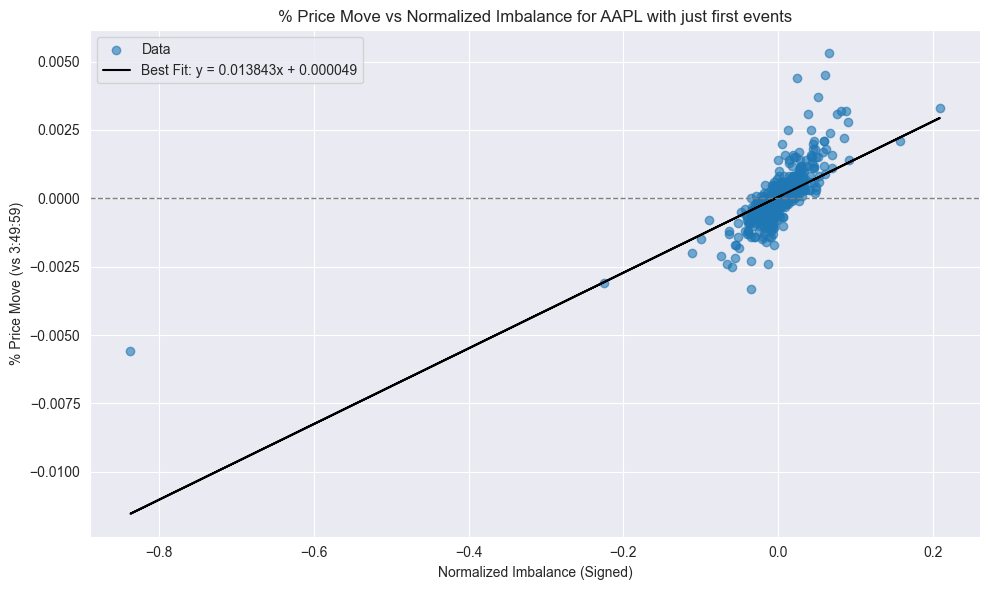

min value is -0.8368388101530483 and index is 386 the date for this is 2024-09-20 15:50:00.148992201-04:00
coefficients are 0.013842627594114474 and 4.9281198868563115e-05
R-squared: 0.4604874119634794
RMSE: 0.0007295424299679844


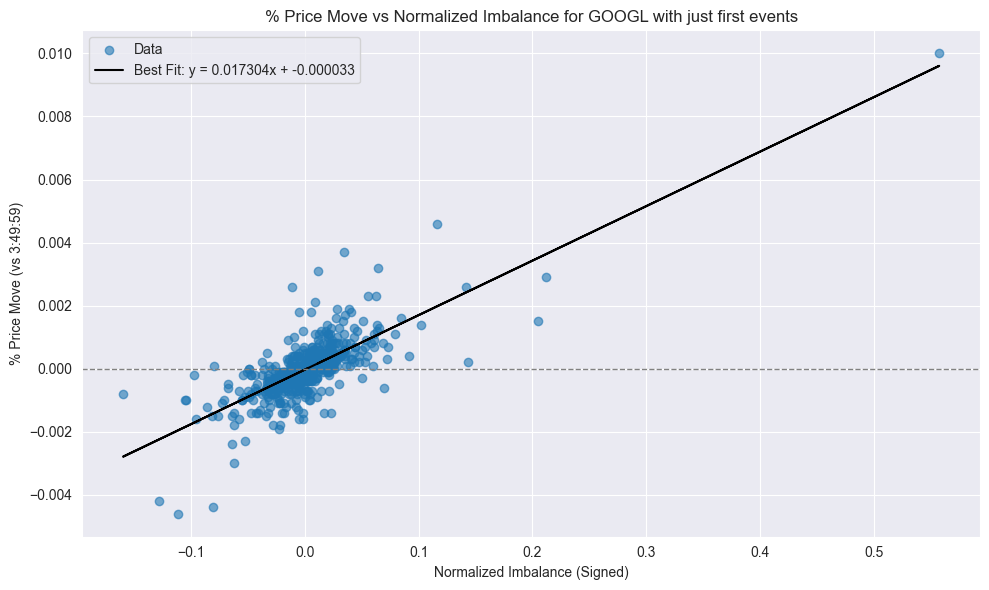

min value is -0.1594047116571899 and index is 354 the date for this is 2024-08-06 15:50:00.110320911-04:00
coefficients are 0.01730354555528009 and -3.2590786733475416e-05
R-squared: 0.572785797672873
RMSE: 0.0006537074555521798


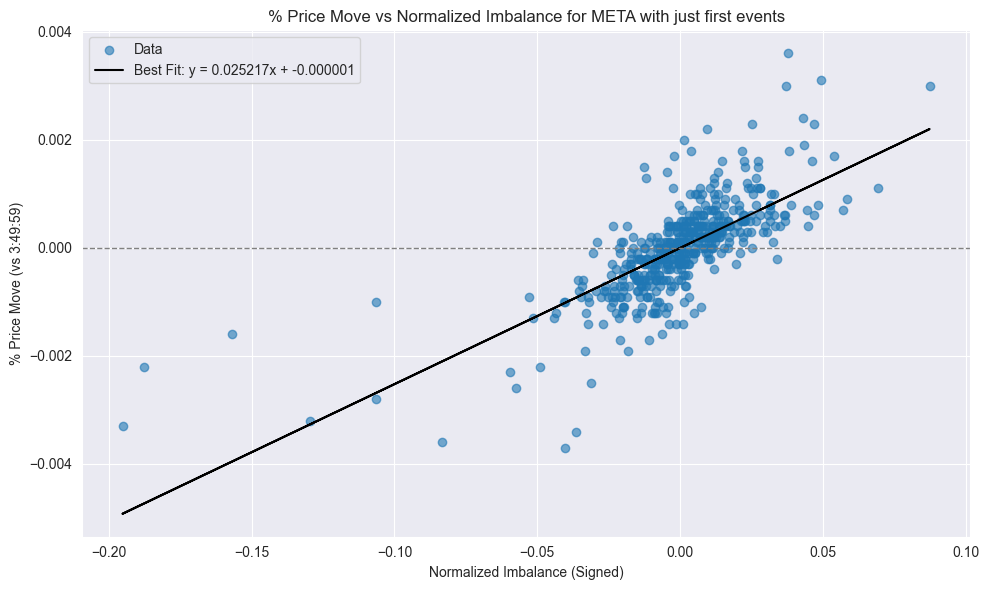

min value is -0.1951008930333133 and index is 329 the date for this is 2024-06-28 15:50:00.075708709-04:00
coefficients are 0.0252166079306132 and -1.2910422889453808e-06
R-squared: 0.5297802087138006
RMSE: 0.0006018737693951529


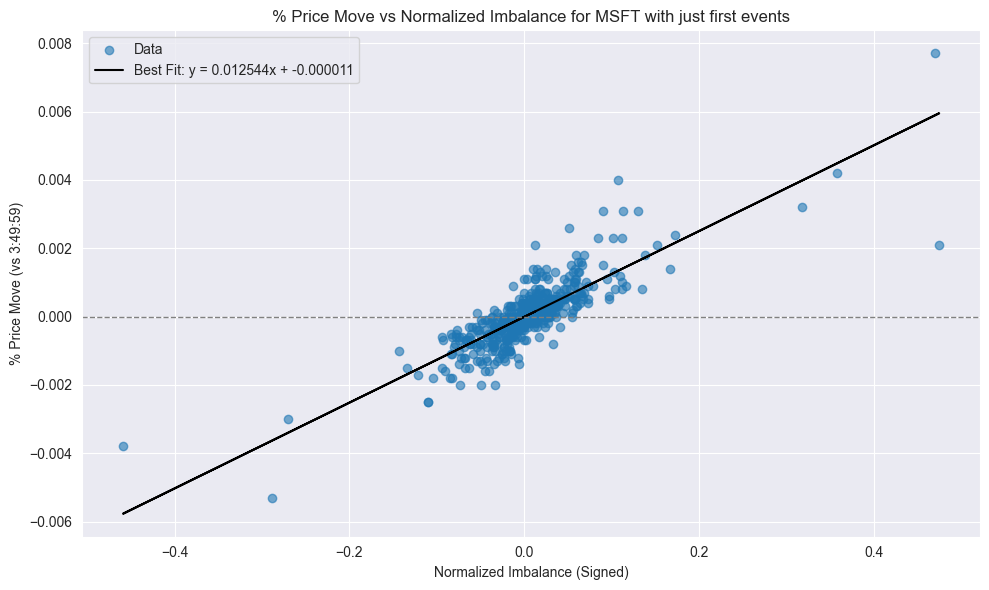

min value is -0.4591768681776134 and index is 386 the date for this is 2024-09-20 15:50:00.178125286-04:00
coefficients are 0.012544260807211789 and -1.1014370841352796e-05
R-squared: 0.6928925727043935
RMSE: 0.0005343484260447651


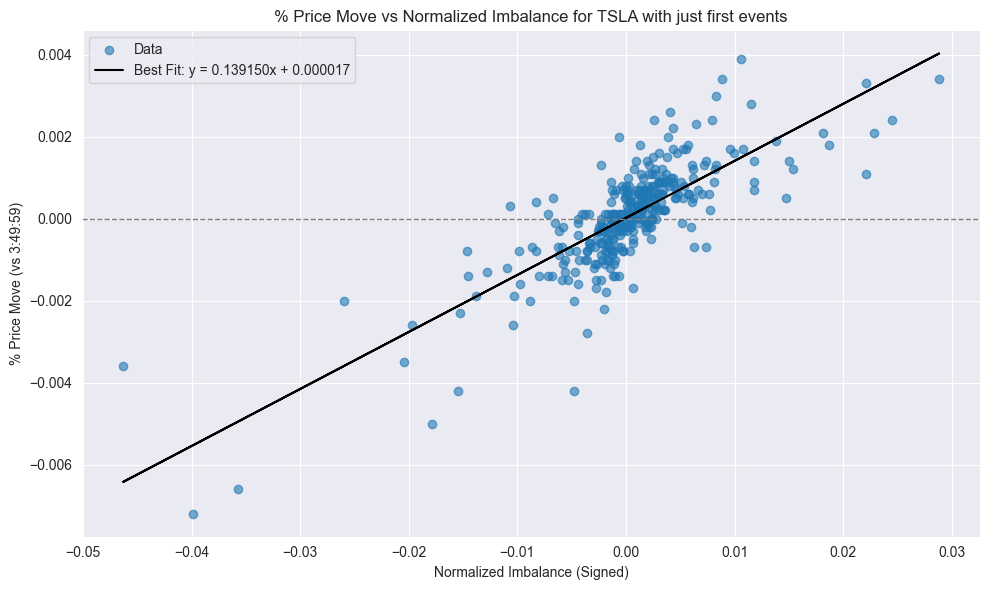

min value is -0.0463000968350046 and index is 386 the date for this is 2024-09-20 15:50:00.138629778-04:00
coefficients are 0.13914977891867433 and 1.6859988408864066e-05
R-squared: 0.6288719861797202
RMSE: 0.0007737538795349755


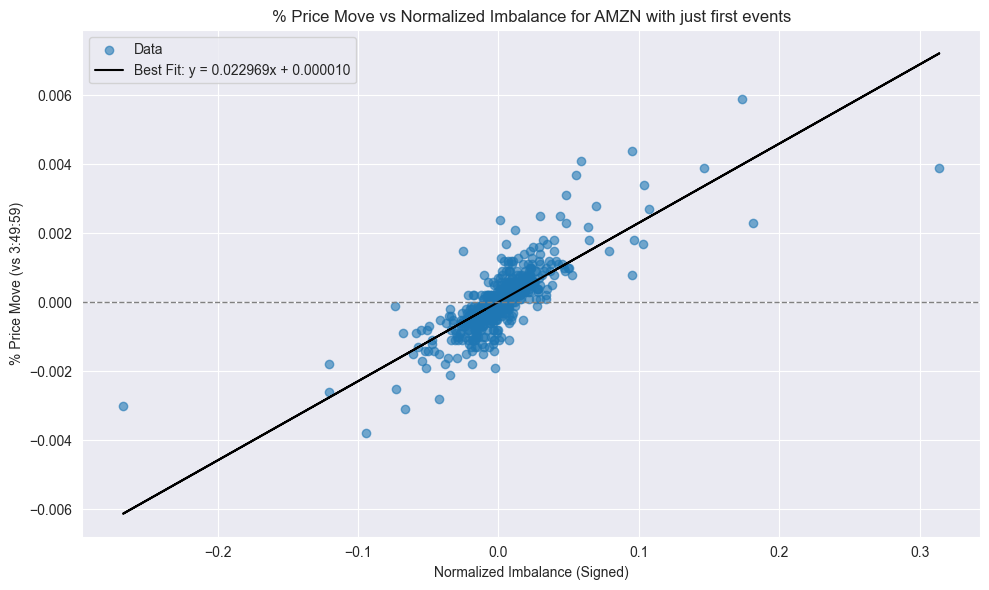

min value is -0.2673533097027624 and index is 326 the date for this is 2024-06-25 15:50:00.016338599-04:00
coefficients are 0.022969078274096773 and 1.0266080881195667e-05
R-squared: 0.6216018316486547
RMSE: 0.0006138698082603407


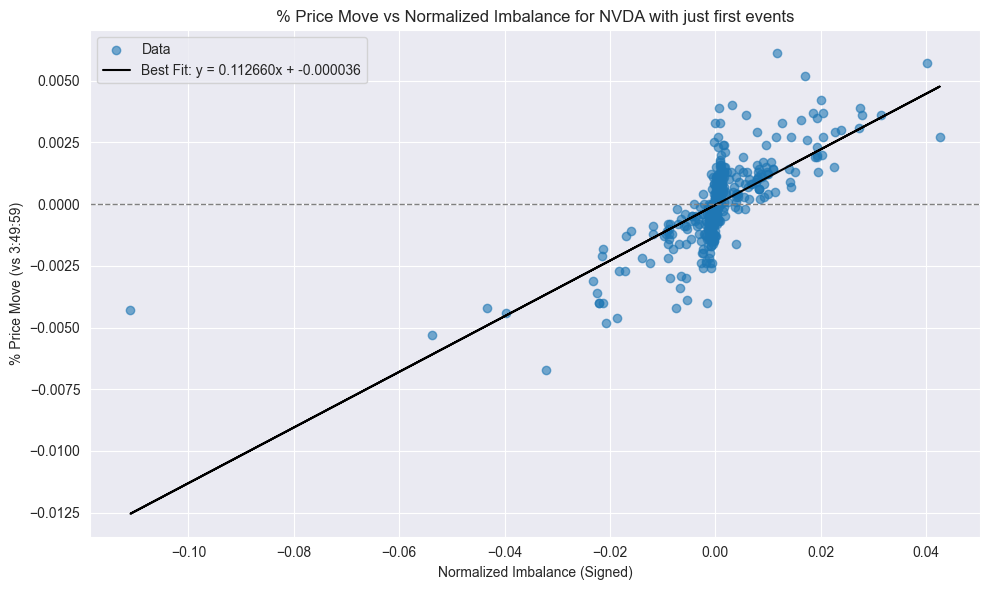

min value is -0.1109883100082717 and index is 386 the date for this is 2024-09-20 15:50:00.217866792-04:00
coefficients are 0.11266039626756413 and -3.560482931112302e-05
R-squared: 0.5130651931520844
RMSE: 0.001047669405041619


In [125]:
for symbol in symbols:
    df_name_final = f"df_imbalance_finalised_{symbol}"
    locals()[df_name_final] = pd.read_csv(df_name_final+'.csv')

     # Drop NaNs
    df_plot = locals()[df_name_final].dropna(subset=['Norm_imb', 'pct_price_move'])

    # Extract x and y
    x = df_plot['Norm_imb']*(0.01)
    y = df_plot['pct_price_move']

    # Fit a straight line: y = m*x + b
    m, b = np.polyfit(x, y, 1)

    # Plot scatter and best fit line
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.6, label='Data')
    plt.plot(x, m*x + b, color='black', label=f'Best Fit: y = {m:.6f}x + {b:.6f}')
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.xlabel('Normalized Imbalance (Signed)')
    plt.ylabel('% Price Move (vs 3:49:59)')
    plt.title(f"% Price Move vs Normalized Imbalance for {symbol} with just first events")
    plt.legend()
    plt.tight_layout()
    plt.show()

    #x_r2 = (df_plot['Norm_imb'].values)*
   # y = df_plot['pct_price_move']*100

    x_r2 = x.values.reshape(-1, 1)
    # Create and fit the model
    model = LinearRegression()
    model.fit(x_r2, y)

    # Make predictions
    y_pred = model.predict(x_r2)

    # Calculate R-squared
    r2 = r2_score(y, y_pred)

    rmse = np.sqrt(np.mean((y - y_pred)**2))

    min_value = df_plot['Norm_imb'].min()
    min_indx = df_plot['Norm_imb'].idxmin()

    print(f"min value is {min_value} and index is {min_indx} the date for this is {locals()[df_name_final]['ts_event'].iloc[min_indx]}")
    print(f"coefficients are {m} and {b}")
    print(f"R-squared: {r2}")
    print(f"RMSE: {rmse}")



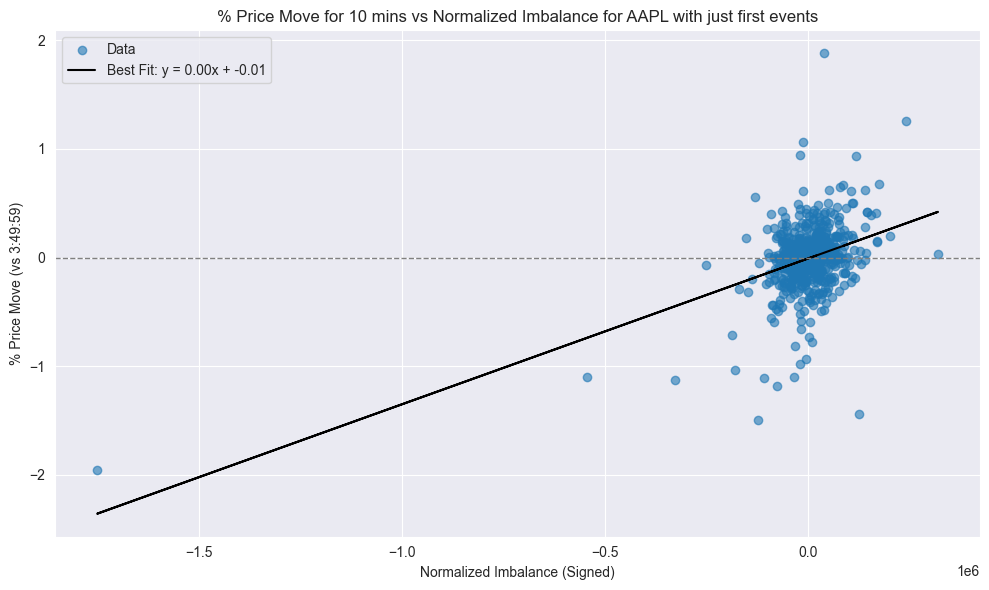

R-squared: 0.18151280266700298
RMSE: 0.2957207996341441


C:\Users\PC\AppData\Local\Temp\ipykernel_31312\129379661.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['10_min_pct_move'] = round((df_plot['Close']/df_plot['p_ref'] - 1)*100,3)


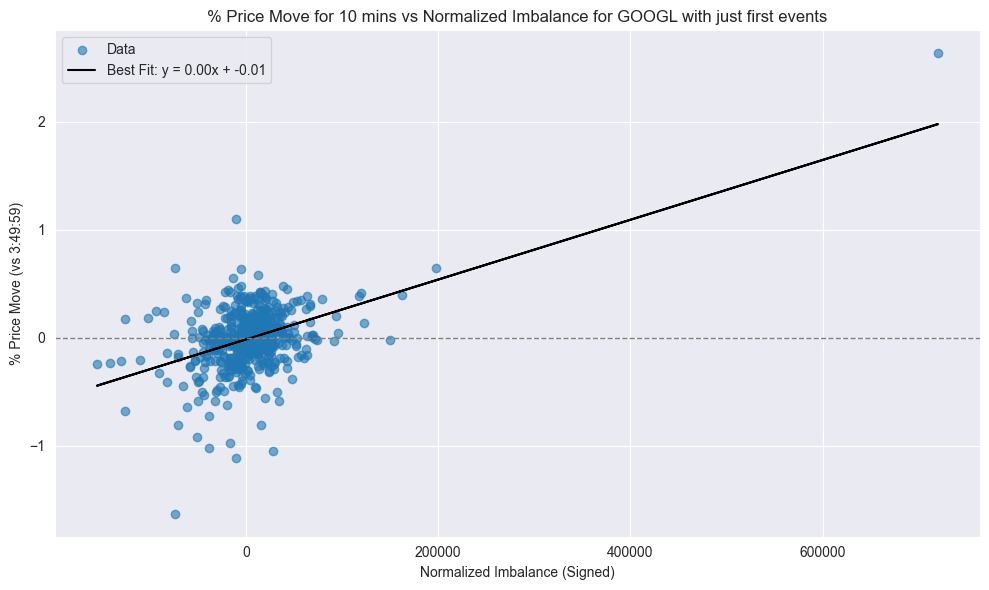

R-squared: 0.2121857168810345
RMSE: 0.2637364338675998


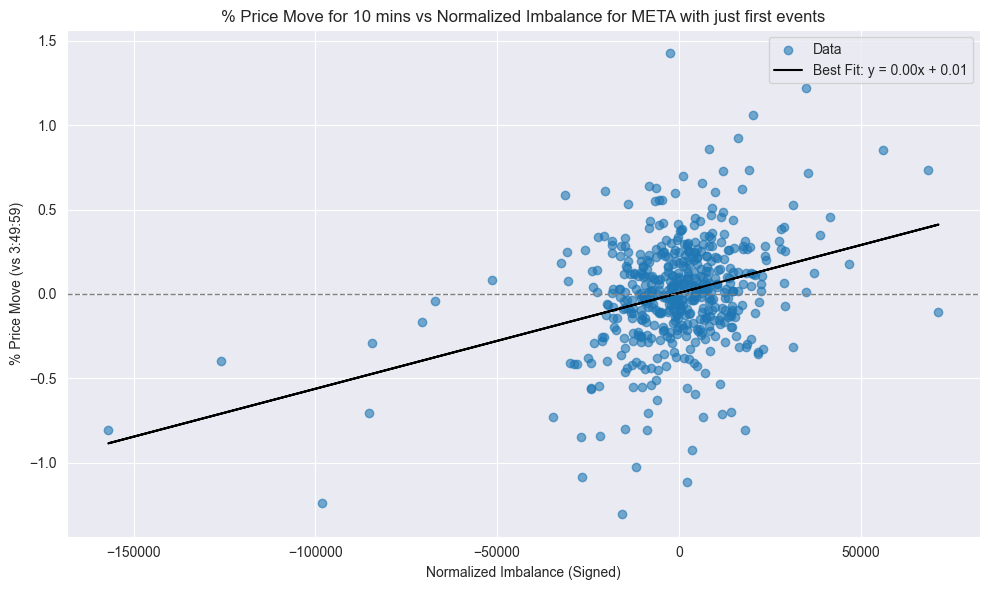

R-squared: 0.10622522342845342
RMSE: 0.30609199587383346


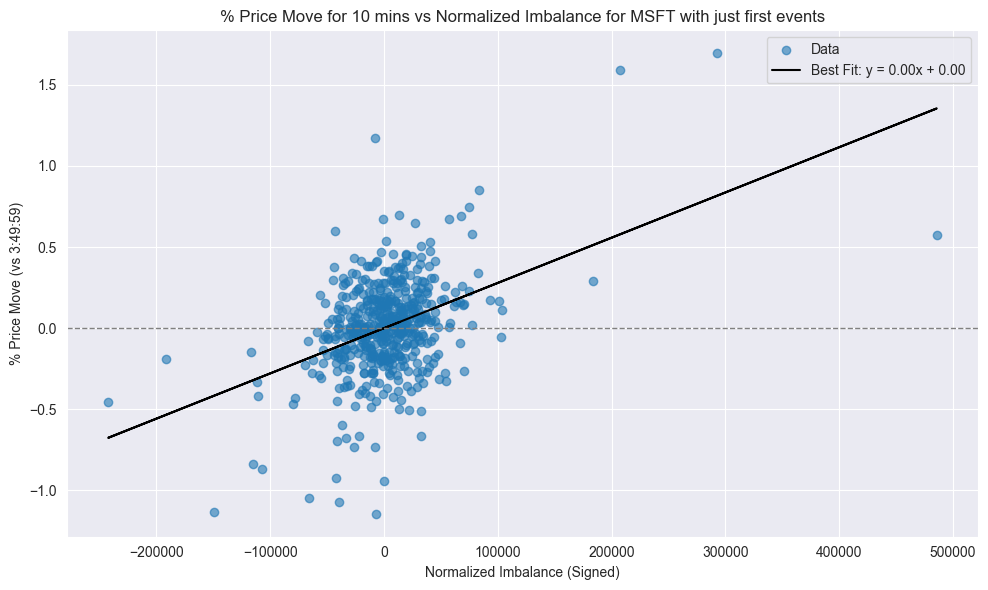

R-squared: 0.18007893507187733
RMSE: 0.2700505782475728


C:\Users\PC\AppData\Local\Temp\ipykernel_31312\129379661.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['10_min_pct_move'] = round((df_plot['Close']/df_plot['p_ref'] - 1)*100,3)


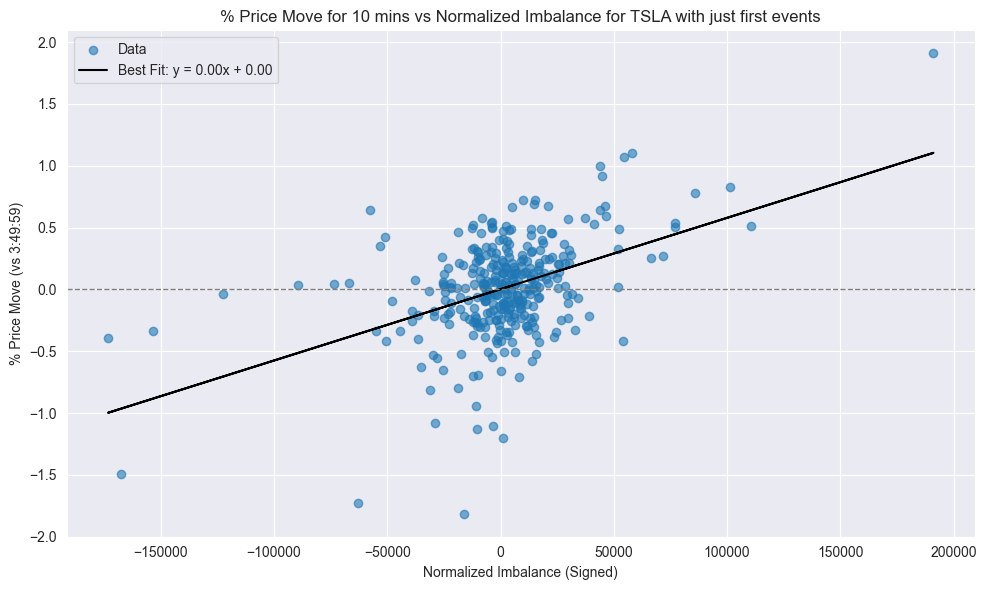

R-squared: 0.20408108080206988
RMSE: 0.3524229990718792


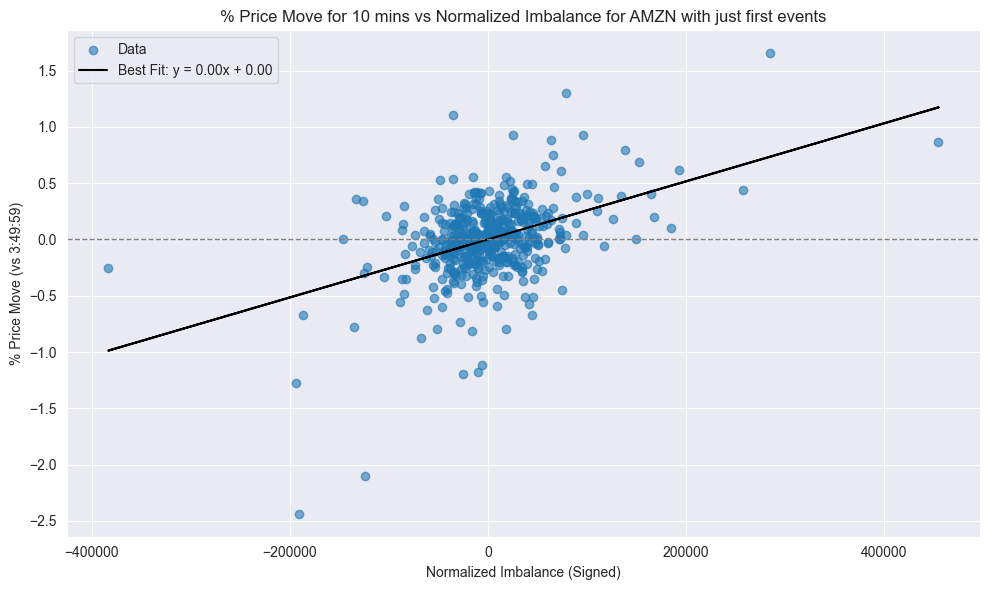

R-squared: 0.1890916699680133
RMSE: 0.30356845949393013


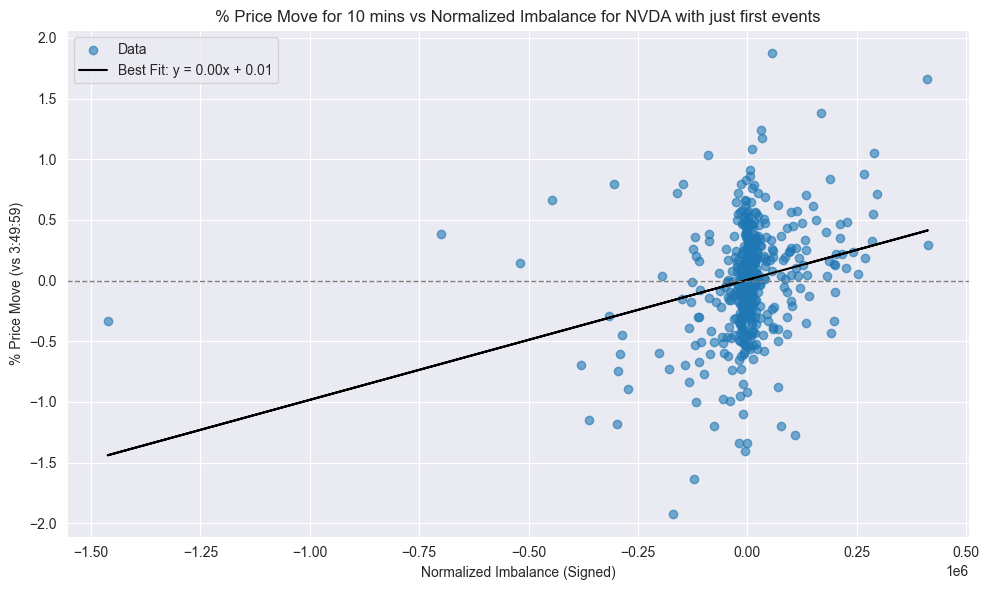

R-squared: 0.06782355601538204
RMSE: 0.4257381954895396


In [56]:
for symbol in symbols:
    df_name_final = f"df_imbalance_finalised_{symbol}"
    locals()[df_name_final] = pd.read_csv(df_name_final+'.csv')

     # Drop NaNs
    df_plot = locals()[df_name_final].dropna(subset=['Norm_imb', 'Close','p_ref','p_imb'])
    df_plot['10_min_pct_move'] = round((df_plot['Close']/df_plot['p_ref'] - 1)*100,3)

    # Extract x and y
    x = df_plot['Norm_imb']
    y = df_plot['10_min_pct_move']

    # Fit a straight line: y = m*x + b
    m, b = np.polyfit(x, y, 1)

    # Plot scatter and best fit line
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.6, label='Data')
    plt.plot(x, m*x + b, color='black', label=f'Best Fit: y = {m:.2f}x + {b:.2f}')
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.xlabel('Normalized Imbalance (Signed)')
    plt.ylabel('% Price Move (vs 3:49:59)')
    plt.title(f"% Price Move for 10 mins vs Normalized Imbalance for {symbol} with just first events")
    plt.legend()
    plt.tight_layout()
    plt.show()

    x_r2 = df_plot['Norm_imb'].values
    y = df_plot['10_min_pct_move']

    x_r2 = x_r2.reshape(-1, 1)
    # Create and fit the model
    model = LinearRegression()
    model.fit(x_r2, y)

    # Make predictions
    y_pred = model.predict(x_r2)

    # Calculate R-squared
    r2 = r2_score(y, y_pred)

    rmse = np.sqrt(np.mean((y - y_pred)**2))

    print(f"R-squared: {r2}")
    print(f"RMSE: {rmse}")



for all stock combined

In [24]:
symbol_colors = {
    'AAPL': 'red',
    'GOOGL': 'blue',
    'META': 'green',
    'MSFT': 'orange',
    'TSLA': 'purple',
    'AMZN': 'cyan',
    'NVDA': 'magenta'
}

C:\Users\PC\AppData\Local\Temp\ipykernel_31312\1961103973.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


AAPL R-squared: 0.4604874119634794
AAPL RMSE: 0.0007295424299679844
GOOGL R-squared: 0.572785797672873
GOOGL RMSE: 0.0006537074555521798
META R-squared: 0.5297802087138006
META RMSE: 0.0006018737693951529
MSFT R-squared: 0.6928925727043935
MSFT RMSE: 0.0005343484260447651
TSLA R-squared: 0.6288719861797202
TSLA RMSE: 0.0007737538795349755
AMZN R-squared: 0.6216018316486547
AMZN RMSE: 0.0006138698082603407
NVDA R-squared: 0.5130651931520844
NVDA RMSE: 0.001047669405041619


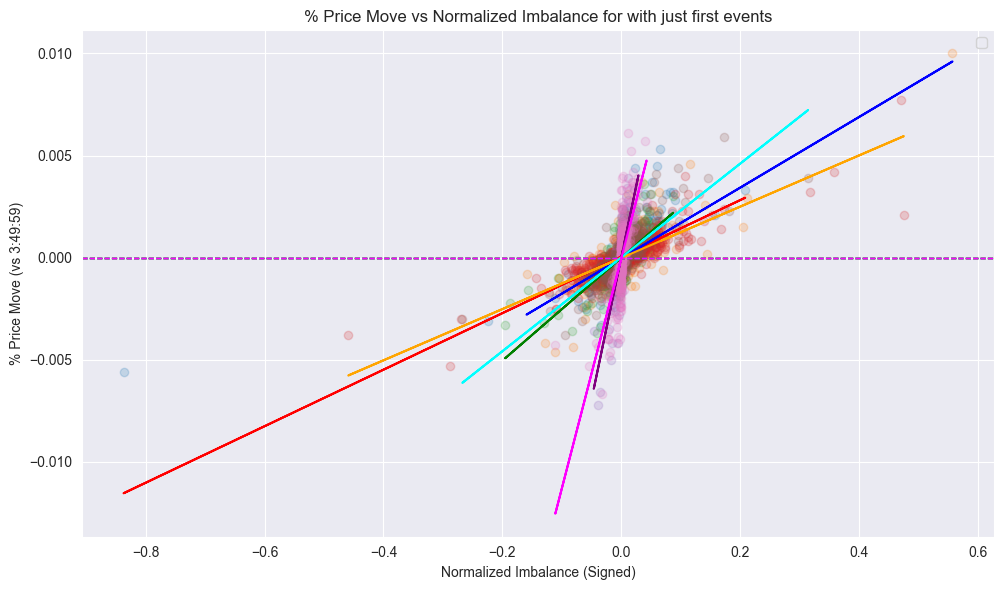

In [25]:
# Plot scatter and best fit line
plt.figure(figsize=(10, 6))
plt.xlabel('Normalized Imbalance (Signed)')
plt.ylabel('% Price Move (vs 3:49:59)')
plt.title(f"% Price Move vs Normalized Imbalance for with just first events")
plt.legend()
plt.tight_layout()

for symbol in symbols:
    df_name_final = f"df_imbalance_finalised_{symbol}"
    locals()[df_name_final] = pd.read_csv(df_name_final+'.csv')

     # Drop NaNs
    df_plot = locals()[df_name_final].dropna(subset=['Norm_imb', 'pct_price_move'])

    # Extract x and y
    x = df_plot['Norm_imb']
    y = df_plot['pct_price_move']

    # Fit a straight line: y = m*x + b
    m, b = np.polyfit(x, y, 1)

    color_pick = symbol_colors[symbol]
    apha_pick = 0.2
    plt.scatter(x, y, alpha=apha_pick, label='Data' )
    plt.plot(x, m*x + b, color=color_pick, label=f'Best Fit: y = {m:.2f}x + {b:.2f}')
    plt.axhline(0, color=color_pick, linestyle='--', linewidth=1)
    # plt.xlabel('Normalized Imbalance (Signed)')
    # plt.ylabel('% Price Move (vs 3:49:59)')
    # plt.title(f"% Price Move vs Normalized Imbalance for {symbol} with just first events")
    # plt.legend()
    # plt.tight_layout()

    apha_pick+=0.1

    x_r2 = df_plot['Norm_imb'].values
    y = df_plot['pct_price_move']

    x_r2 = x_r2.reshape(-1, 1)
    # Create and fit the model
    model = LinearRegression()
    model.fit(x_r2, y)

    # Make predictions
    y_pred = model.predict(x_r2)

    # Calculate R-squared
    r2 = r2_score(y, y_pred)

    rmse = np.sqrt(np.mean((y - y_pred)**2))

    print(f"{symbol} R-squared: {r2}")
    print(f"{symbol} RMSE: {rmse}")



In [26]:
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_31312\1337701821.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\PC\AppData\Local\Temp\ipykernel_31312\1337701821.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['10_min_pct_move'] = round((df_plot['Close']/df_plot['p_ref'] - 1)*100,3)
C:\Users\PC\AppData\Local\Temp\ipykernel_31312\1337701821.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

AAPL R-squared: 0.4604874119634794
AAPL RMSE: 0.0007295424299679844
GOOGL R-squared: 0.572785797672873
GOOGL RMSE: 0.0006537074555521798
META R-squared: 0.5297802087138006
META RMSE: 0.0006018737693951529
MSFT R-squared: 0.6928925727043935
MSFT RMSE: 0.0005343484260447651
TSLA R-squared: 0.6288719861797202
TSLA RMSE: 0.0007737538795349755
AMZN R-squared: 0.6216018316486547
AMZN RMSE: 0.0006138698082603407
NVDA R-squared: 0.5130651931520844
NVDA RMSE: 0.001047669405041619


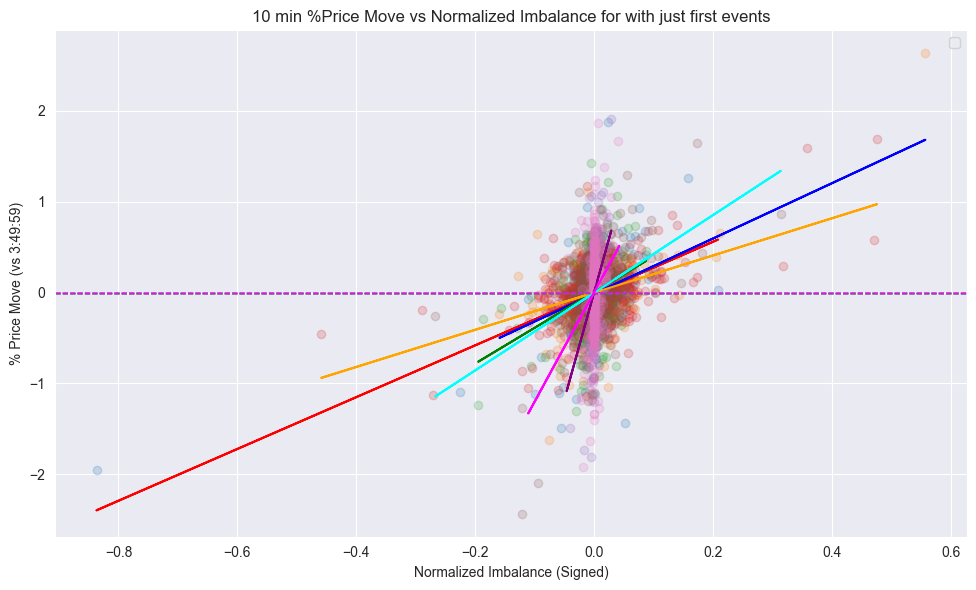

In [27]:
# Plot scatter and best fit line
plt.figure(figsize=(10, 6))
plt.xlabel('Normalized Imbalance (Signed)')
plt.ylabel('% Price Move (vs 3:49:59)')
plt.title(f"10 min %Price Move vs Normalized Imbalance for with just first events")
plt.legend()
plt.tight_layout()

for symbol in symbols:
    df_name_final = f"df_imbalance_finalised_{symbol}"
    locals()[df_name_final] = pd.read_csv(df_name_final+'.csv')

     # Drop NaNs
    df_plot = locals()[df_name_final].dropna(subset=['Norm_imb', 'Close','p_ref','p_imb'])
    df_plot['10_min_pct_move'] = round((df_plot['Close']/df_plot['p_ref'] - 1)*100,3)

    # Extract x and y
    x = df_plot['Norm_imb']
    y = df_plot['10_min_pct_move']

    # Fit a straight line: y = m*x + b
    m, b = np.polyfit(x, y, 1)

    color_pick = symbol_colors[symbol]
    apha_pick = 0.2
    plt.scatter(x, y, alpha=apha_pick, label='Data' )
    plt.plot(x, m*x + b, color=color_pick, label=f'Best Fit: y = {m:.2f}x + {b:.2f}')
    plt.axhline(0, color=color_pick, linestyle='--', linewidth=1)
    # plt.xlabel('Normalized Imbalance (Signed)')
    # plt.ylabel('% Price Move (vs 3:49:59)')
    # plt.title(f"% Price Move vs Normalized Imbalance for {symbol} with just first events")
    # plt.legend()
    # plt.tight_layout()

    apha_pick+=0.1

    x_r2 = df_plot['Norm_imb'].values
    y = df_plot['pct_price_move']

    x_r2 = x_r2.reshape(-1, 1)
    # Create and fit the model
    model = LinearRegression()
    model.fit(x_r2, y)

    # Make predictions
    y_pred = model.predict(x_r2)

    # Calculate R-squared
    r2 = r2_score(y, y_pred)

    rmse = np.sqrt(np.mean((y - y_pred)**2))

    print(f"{symbol} R-squared: {r2}")
    print(f"{symbol} RMSE: {rmse}")



with combined df for r2 or rmse

In [30]:
df_combined = pd.DataFrame()
for symbol in symbols:
    df_name_final = f"df_imbalance_finalised_{symbol}"
    locals()[df_name_final] = pd.read_csv(df_name_final+'.csv')
    df_combined = pd.concat([df_combined,locals()[df_name_final]],axis=0)

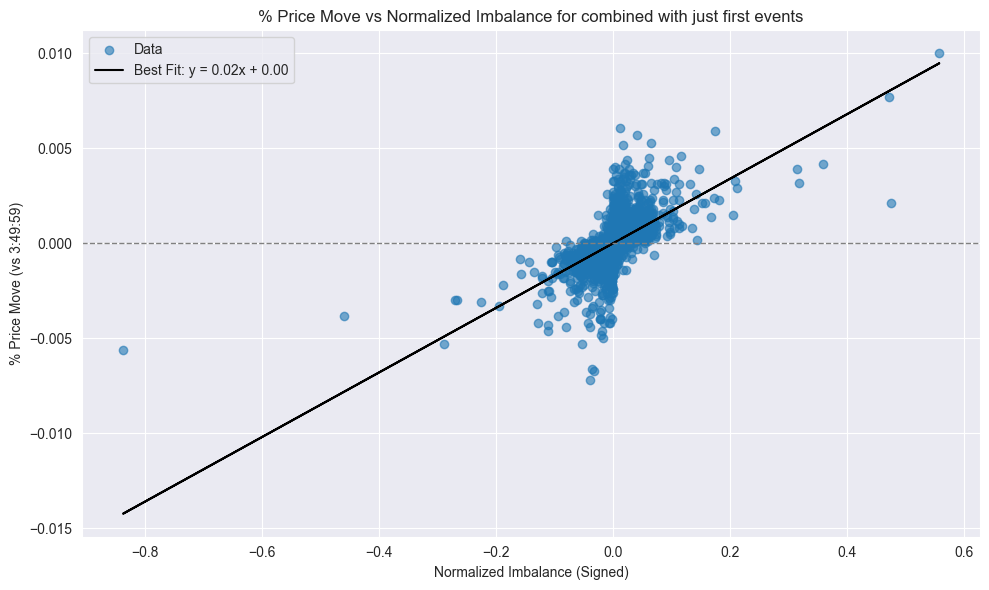

R-squared: 0.3717252810129612
RMSE: 0.000869575421133383


In [31]:
# Drop NaNs
df_plot = df_combined.dropna(subset=['Norm_imb', 'pct_price_move'])

# Extract x and y
x = df_plot['Norm_imb']
y = df_plot['pct_price_move']

# Fit a straight line: y = m*x + b
m, b = np.polyfit(x, y, 1)

# Plot scatter and best fit line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, label='Data')
plt.plot(x, m*x + b, color='black', label=f'Best Fit: y = {m:.2f}x + {b:.2f}')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Normalized Imbalance (Signed)')
plt.ylabel('% Price Move (vs 3:49:59)')
plt.title(f"% Price Move vs Normalized Imbalance for combined with just first events")
plt.legend()
plt.tight_layout()
plt.show()

x_r2 = df_plot['Norm_imb'].values
y = df_plot['pct_price_move']

x_r2 = x_r2.reshape(-1, 1)
# Create and fit the model
model = LinearRegression()
model.fit(x_r2, y)

# Make predictions
y_pred = model.predict(x_r2)

# Calculate R-squared
r2 = r2_score(y, y_pred)

rmse = np.sqrt(np.mean((y - y_pred)**2))

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

C:\Users\PC\AppData\Local\Temp\ipykernel_31312\2931984340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['10_min_pct_move'] = round((df_plot['Close']/df_plot['p_ref'] - 1)*100,3)


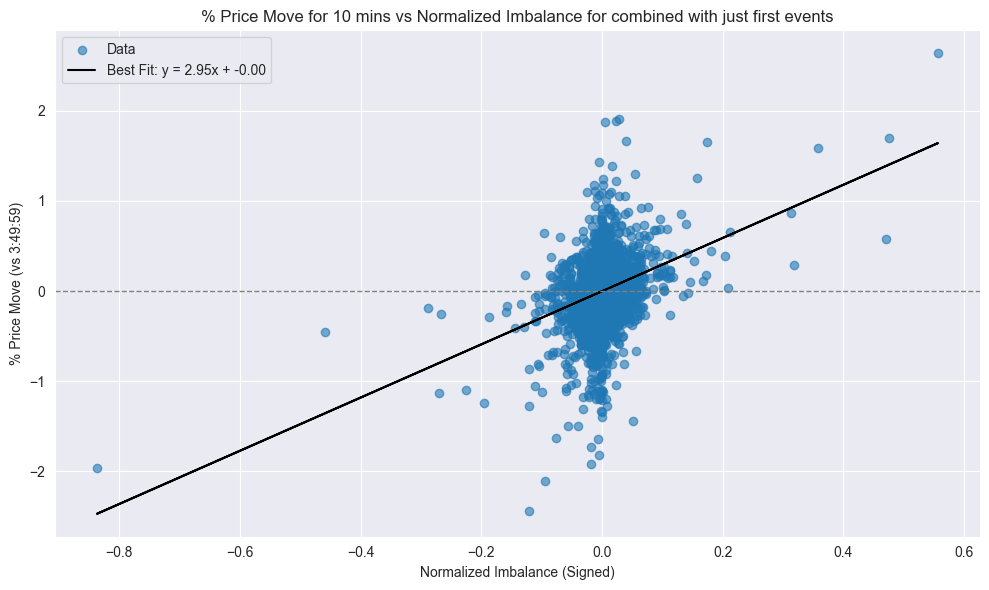

R-squared: 0.11162582442899138
RMSE: 0.32688694416527886


In [32]:
df_plot = df_combined.dropna(subset=['Norm_imb', 'Close','p_ref','p_imb'])
df_plot['10_min_pct_move'] = round((df_plot['Close']/df_plot['p_ref'] - 1)*100,3)

# Extract x and y
x = df_plot['Norm_imb']
y = df_plot['10_min_pct_move']

# Fit a straight line: y = m*x + b
m, b = np.polyfit(x, y, 1)

# Plot scatter and best fit line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, label='Data')
plt.plot(x, m*x + b, color='black', label=f'Best Fit: y = {m:.2f}x + {b:.2f}')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('Normalized Imbalance (Signed)')
plt.ylabel('% Price Move (vs 3:49:59)')
plt.title(f"% Price Move for 10 mins vs Normalized Imbalance for combined with just first events")
plt.legend()
plt.tight_layout()
plt.show()

x_r2 = df_plot['Norm_imb'].values
y = df_plot['10_min_pct_move']

x_r2 = x_r2.reshape(-1, 1)
# Create and fit the model
model = LinearRegression()
model.fit(x_r2, y)

# Make predictions
y_pred = model.predict(x_r2)

# Calculate R-squared
r2 = r2_score(y, y_pred)

rmse = np.sqrt(np.mean((y - y_pred)**2))

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

the dataset already is for only first events ,to run for whole, put new 1day files in imbalance folder and comment one day filtering cell, or to avoid replacing 1 day files, run after the 1 day section only

In [ ]:
for symbol in symbols:
    df_name_final = f"df_imbalance_finalised_{symbol}"

    df_first_per_day = locals()[df_name_final].sort_values('ts_event').groupby(locals()[df_name_final]['date'].dt.date).head(1)


    # Drop NaNs
    df_plot = df_first_per_day.dropna(subset=['Norm_imb', '%price_move'])

    # Extract x and y
    x = df_plot['Norm_imb']
    y = df_plot['%price_move']

    # Fit a straight line: y = m*x + b
    m, b = np.polyfit(x, y, 1)

    # # Calculate limits for zooming in (50% closer to the origin)
    # x_min, x_max = x.min(), x.max()
    # y_min, y_max = y.min(), y.max()
    #
    # x_range = x_max - x_min
    # y_range = y_max - y_min
    #
    # x_new_min = x_min #+ 0.25 * x_range
    # x_new_max = x_max - 0.5 * x_range
    # y_new_min = y_min #+ 0.25 * y_range
    # y_new_max = y_max - 0.25 * y_range

    # Plot scatter and best fit line
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.6, label='Data')
    plt.plot(x, m*x + b, color='black', label=f'Best Fit: y = {m:.2f}x + {b:.2f}')
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.xlabel('Normalized Imbalance (Signed)')
    plt.ylabel('% Price Move (vs 3:49:59)')
    plt.title(f"% Price Move vs Normalized Imbalance for first imbalance per day for {symbol}")


    # # Set new axis limits
    # plt.xlim(x_new_min, x_new_max)
    # plt.ylim(y_new_min, y_new_max)

    plt.legend()
    plt.tight_layout()
    plt.show()